## Task 3 

**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

## About the dataset:
-  The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import plot_tree
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'C:\Users\dvr_s\Downloads\bank-additional-full.csv',sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.rename(columns={'y':'Subscribed_Deposit'},inplace=True)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Subscribed_Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.shape

(41188, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   default             41188 non-null  object 
 5   housing             41188 non-null  object 
 6   loan                41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  campaign            41188 non-null  int64  
 12  pdays               41188 non-null  int64  
 13  previous            41188 non-null  int64  
 14  poutcome            41188 non-null  object 
 15  emp.var.rate        41188 non-null  float64
 16  cons

In [8]:
df.isna().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
Subscribed_Deposit    0
dtype: int64

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.duplicated().sum()

12

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Subscribed_Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


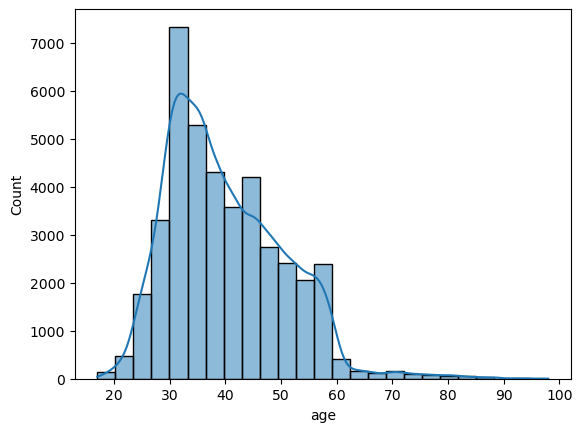

In [14]:
sns.histplot(data=df,x='age',kde=True,bins=25)
plt.show()

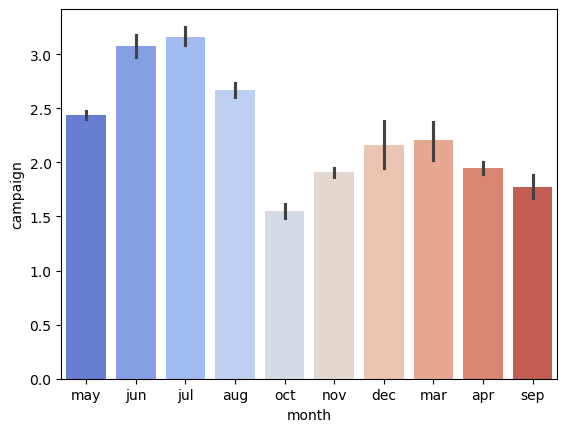

In [15]:
sns.barplot(data=df,x='month',y='campaign',palette='coolwarm')
plt.show()

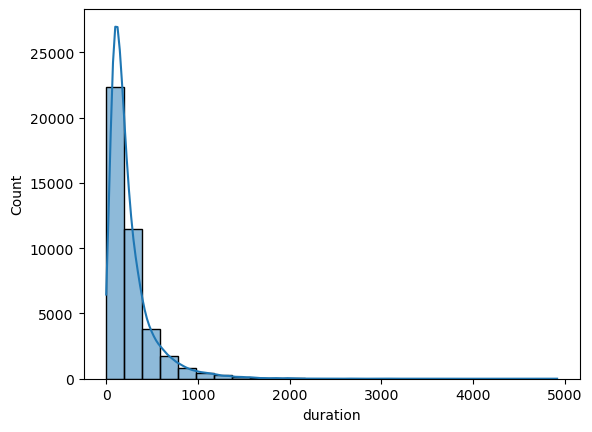

In [16]:
sns.histplot(data=df,x='duration',bins=25,kde=True)
plt.show()

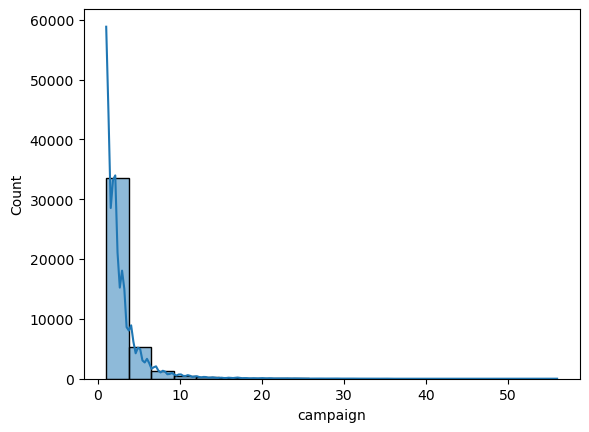

In [17]:
sns.histplot(data=df,x='campaign',bins=20,kde=True)
plt.show()

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'Subscribed_Deposit'],
      dtype='object')

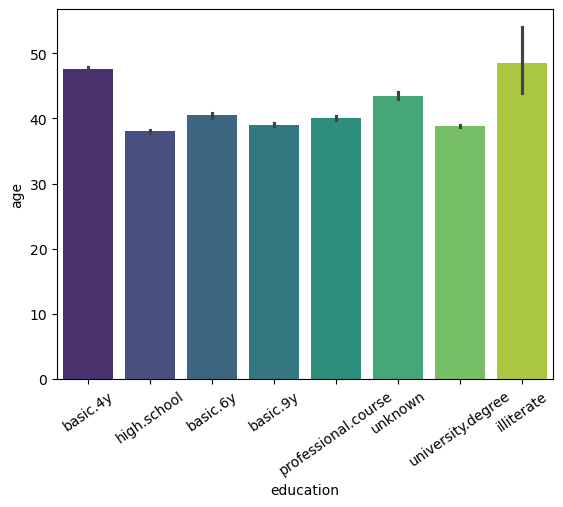

In [19]:
sns.barplot(data=df,x='education',y='age',palette='viridis')
plt.xticks(rotation=35)
plt.show()

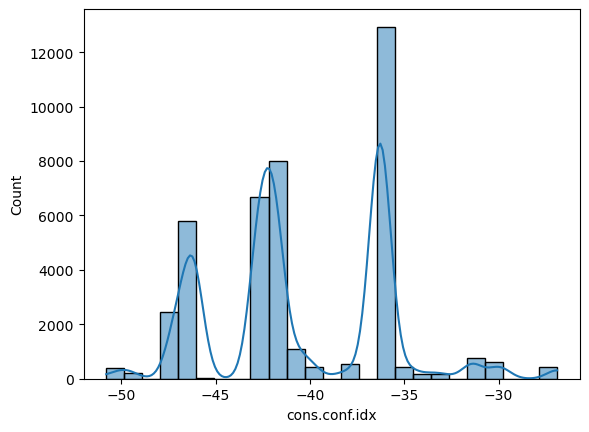

In [20]:
sns.histplot(data=df,x='cons.conf.idx',bins=25,kde=True)
plt.show()

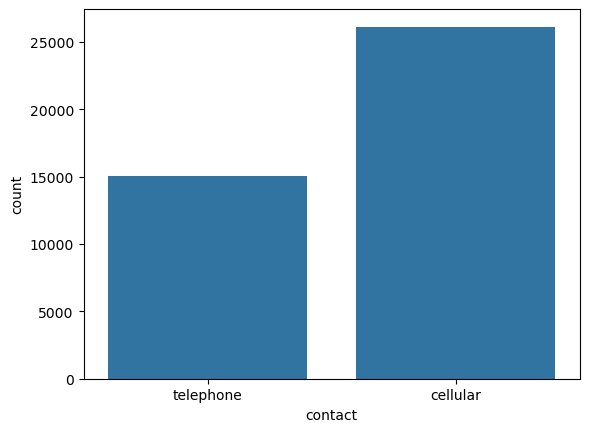

In [21]:
sns.countplot(data=df,x='contact')
plt.show()

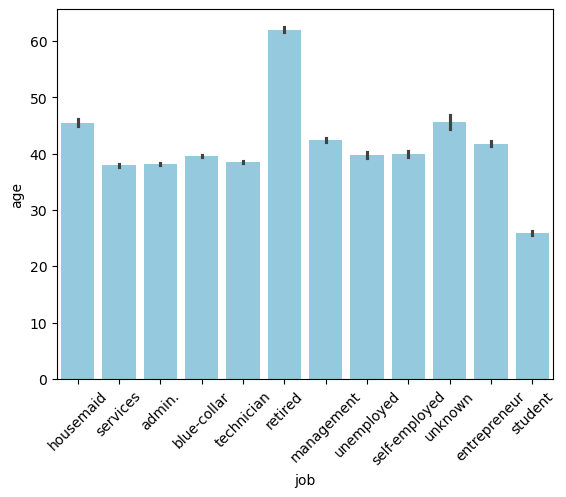

In [22]:
sns.barplot(data=df,x='job',y='age',color='skyblue')
plt.xticks(rotation=45)
plt.show()

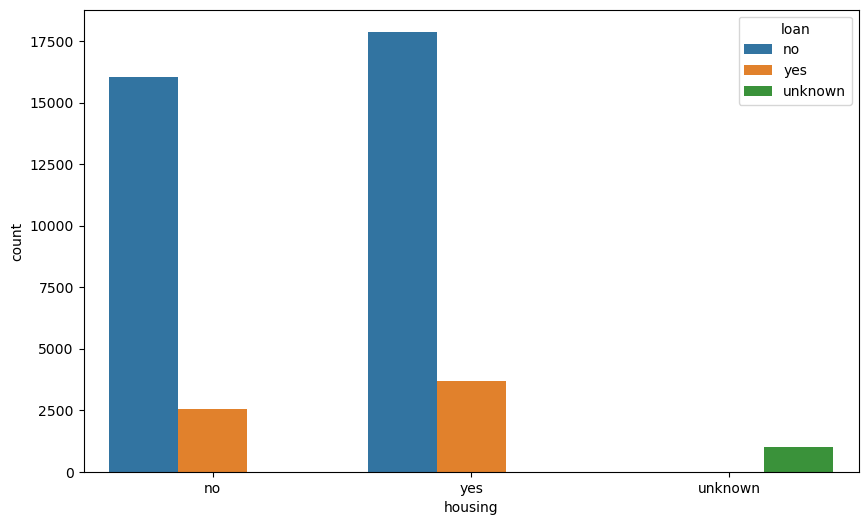

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='housing',hue='loan')
plt.show()

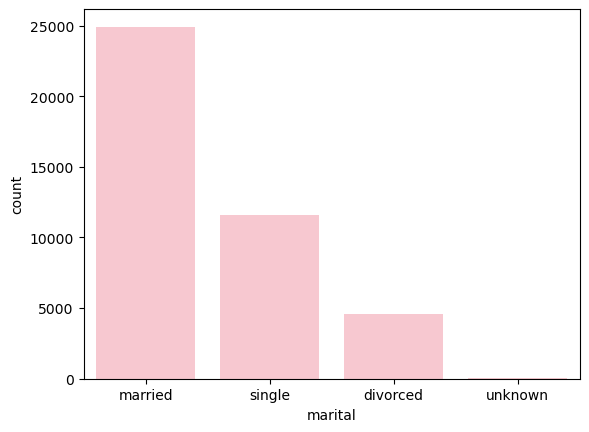

In [24]:
sns.countplot(data=df,x='marital',color='pink')
plt.show()

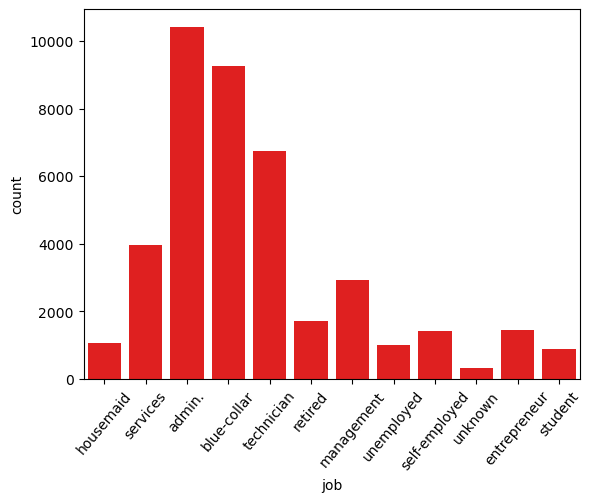

In [25]:
sns.countplot(data=df,x='job',color='red')
plt.xticks(rotation=50)
plt.show()

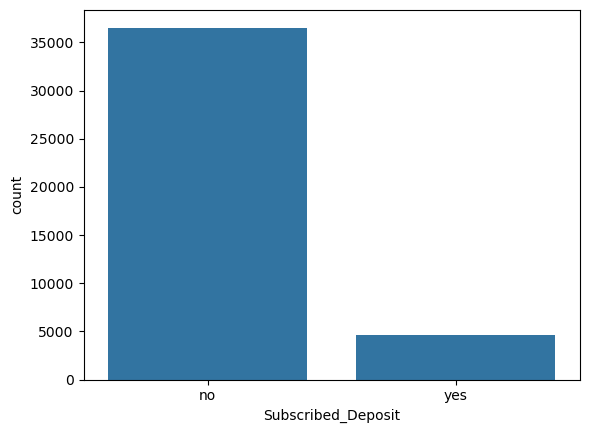

In [26]:
sns.countplot(data=df,x='Subscribed_Deposit')
plt.show()

# Observation

-  In the Job Column, we have seen most of the clients are working as 'admin'.

-  In the marital Column, we have seen most of the clients are married.

-  In the housing Column, we have seen most of the clients are taking housing loan.

-  In the loan Column, we have seen most of the clients are not taking personal loan.

-  In the contact Column, we have seen most of the clients are choosen cellular as contact.

-  In the month Column, we have seen most of the 'campaign' are contacted in the 'july' month.

-  In the target column, we have seen most of the clients are not subscribed a term deposit.

-  In the age column, we have seen most of the clients have age group of 30 to 35.

-  In the Subscribed_Deposit column, we have seen that the data is highly imbalanced.

In [27]:
numeric_df= df[['age','campaign','duration','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

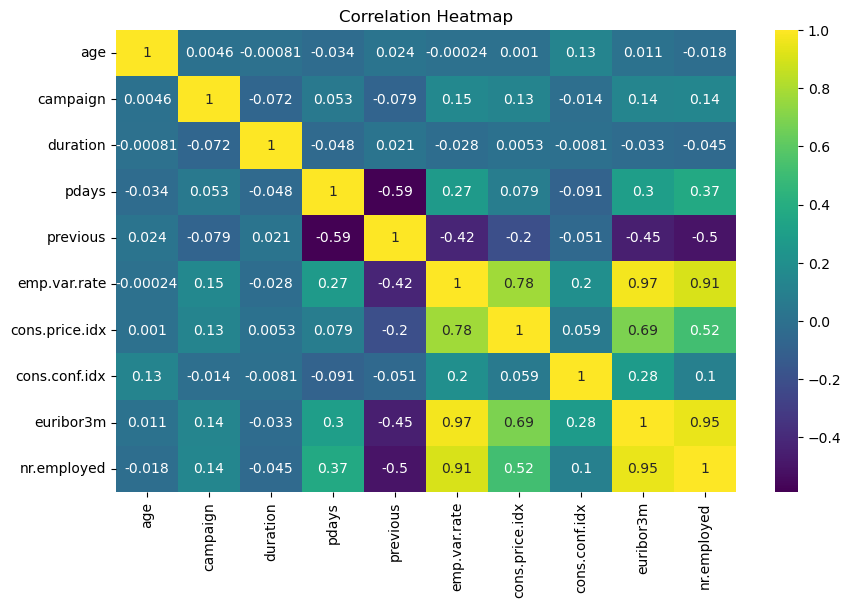

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
high_correlated_columns = ['emp.var.rate','euribor3m','nr.employed']
df.drop(high_correlated_columns,inplace=True,axis=1)

In [30]:
df.shape

(41176, 18)

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,Subscribed_Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,no


In [32]:
label_encoder = LabelEncoder()
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df['Subscribed_Deposit'] = label_encoder.fit_transform(df['Subscribed_Deposit'])

In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,Subscribed_Deposit
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,93.994,-36.4,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,93.994,-36.4,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,93.994,-36.4,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,93.994,-36.4,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,93.994,-36.4,0


In [34]:
df['Subscribed_Deposit'].value_counts(normalize=True)*100

Subscribed_Deposit
0    88.733728
1    11.266272
Name: proportion, dtype: float64

In [35]:
x= df.drop('Subscribed_Deposit',axis=1)
y = df['Subscribed_Deposit']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Using 'Gini' Criterion

In [135]:
DT = DecisionTreeClassifier(random_state=42,
                           max_depth=6,
                           criterion='gini',
                           min_samples_leaf=7,
                           min_samples_split=5,
                           ccp_alpha=0.001)

In [136]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, min_samples_leaf=7,
                       min_samples_split=5, random_state=42)

In [137]:
y_pred = DT.predict(x_test)

In [138]:
print(confusion_matrix(y_test,y_pred))

[[6966  299]
 [ 509  462]]


In [139]:
print(accuracy_score(y_test,y_pred))

0.9018941233608548


In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7265
           1       0.61      0.48      0.53       971

    accuracy                           0.90      8236
   macro avg       0.77      0.72      0.74      8236
weighted avg       0.89      0.90      0.90      8236



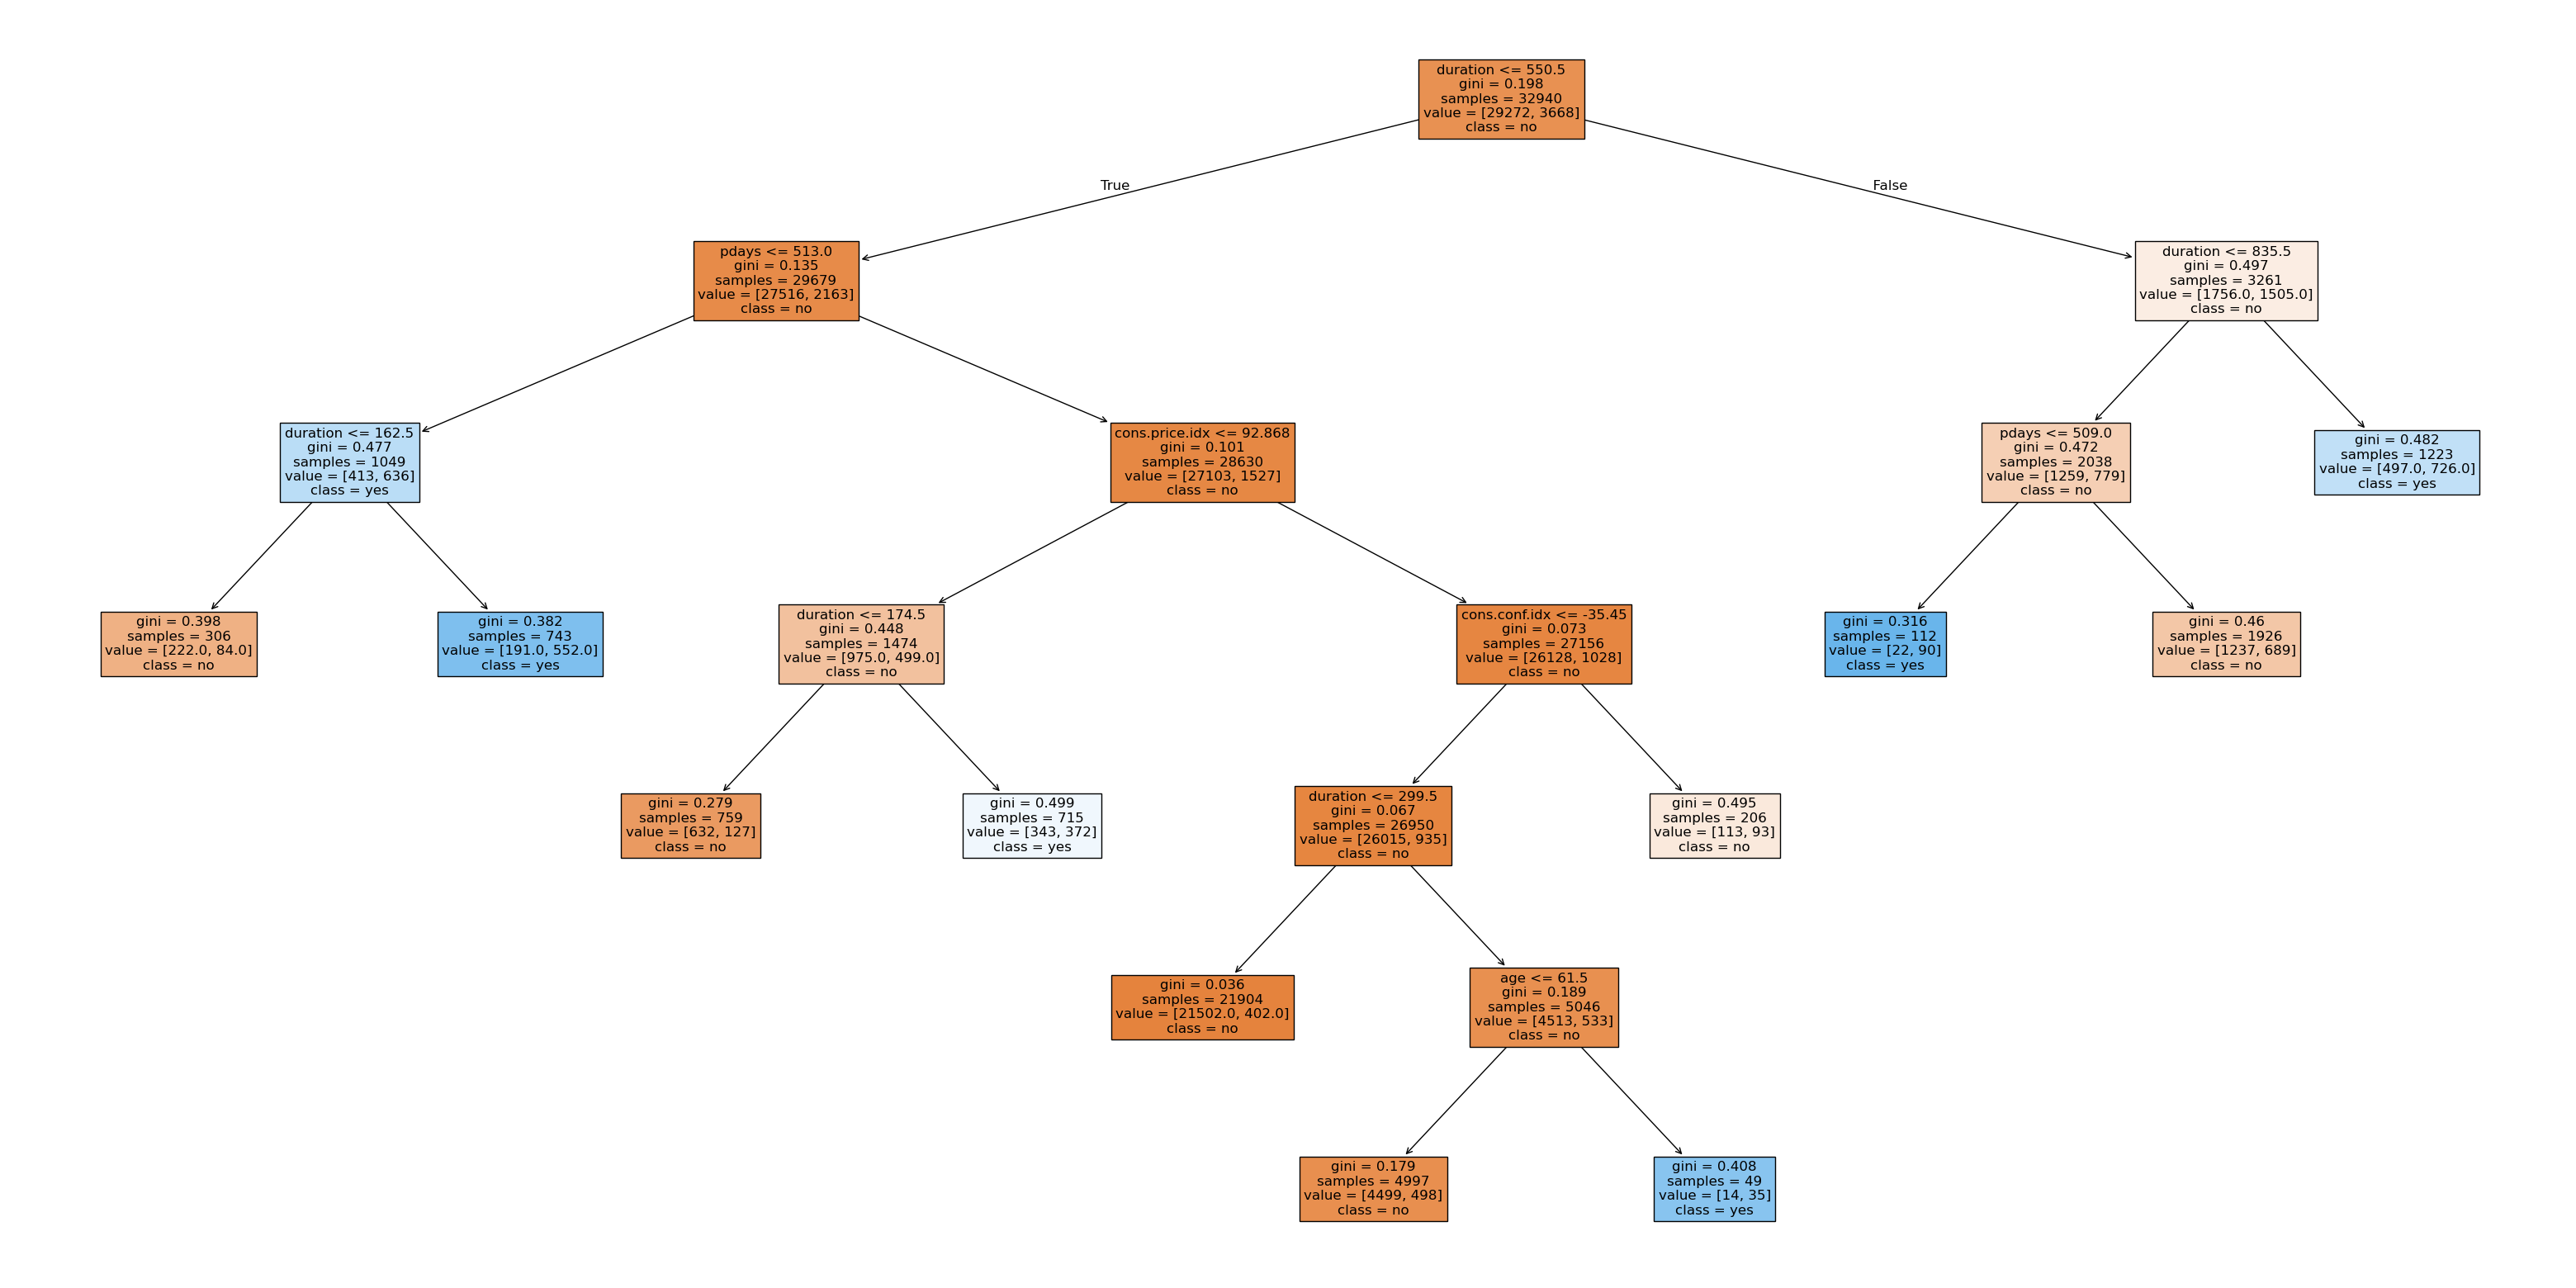

In [141]:
cn=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(DT, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()

# Using 'Entropy' Criterion

In [44]:
DT_0 = DecisionTreeClassifier(random_state=42,
                           max_depth=7,
                           criterion='entropy',
                           min_samples_leaf=7,
                           ccp_alpha=0.001)
DT_0.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       min_samples_leaf=7, random_state=42)

In [45]:
y_pred_0 = DT_0.predict(x_test)

In [46]:
print(confusion_matrix(y_test,y_pred_0))

[[7040  225]
 [ 582  389]]


In [47]:
print(accuracy_score(y_test,y_pred_0))

0.9020155415250122


In [48]:
print(classification_report(y_test,y_pred_0))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.63      0.40      0.49       971

    accuracy                           0.90      8236
   macro avg       0.78      0.68      0.72      8236
weighted avg       0.89      0.90      0.89      8236



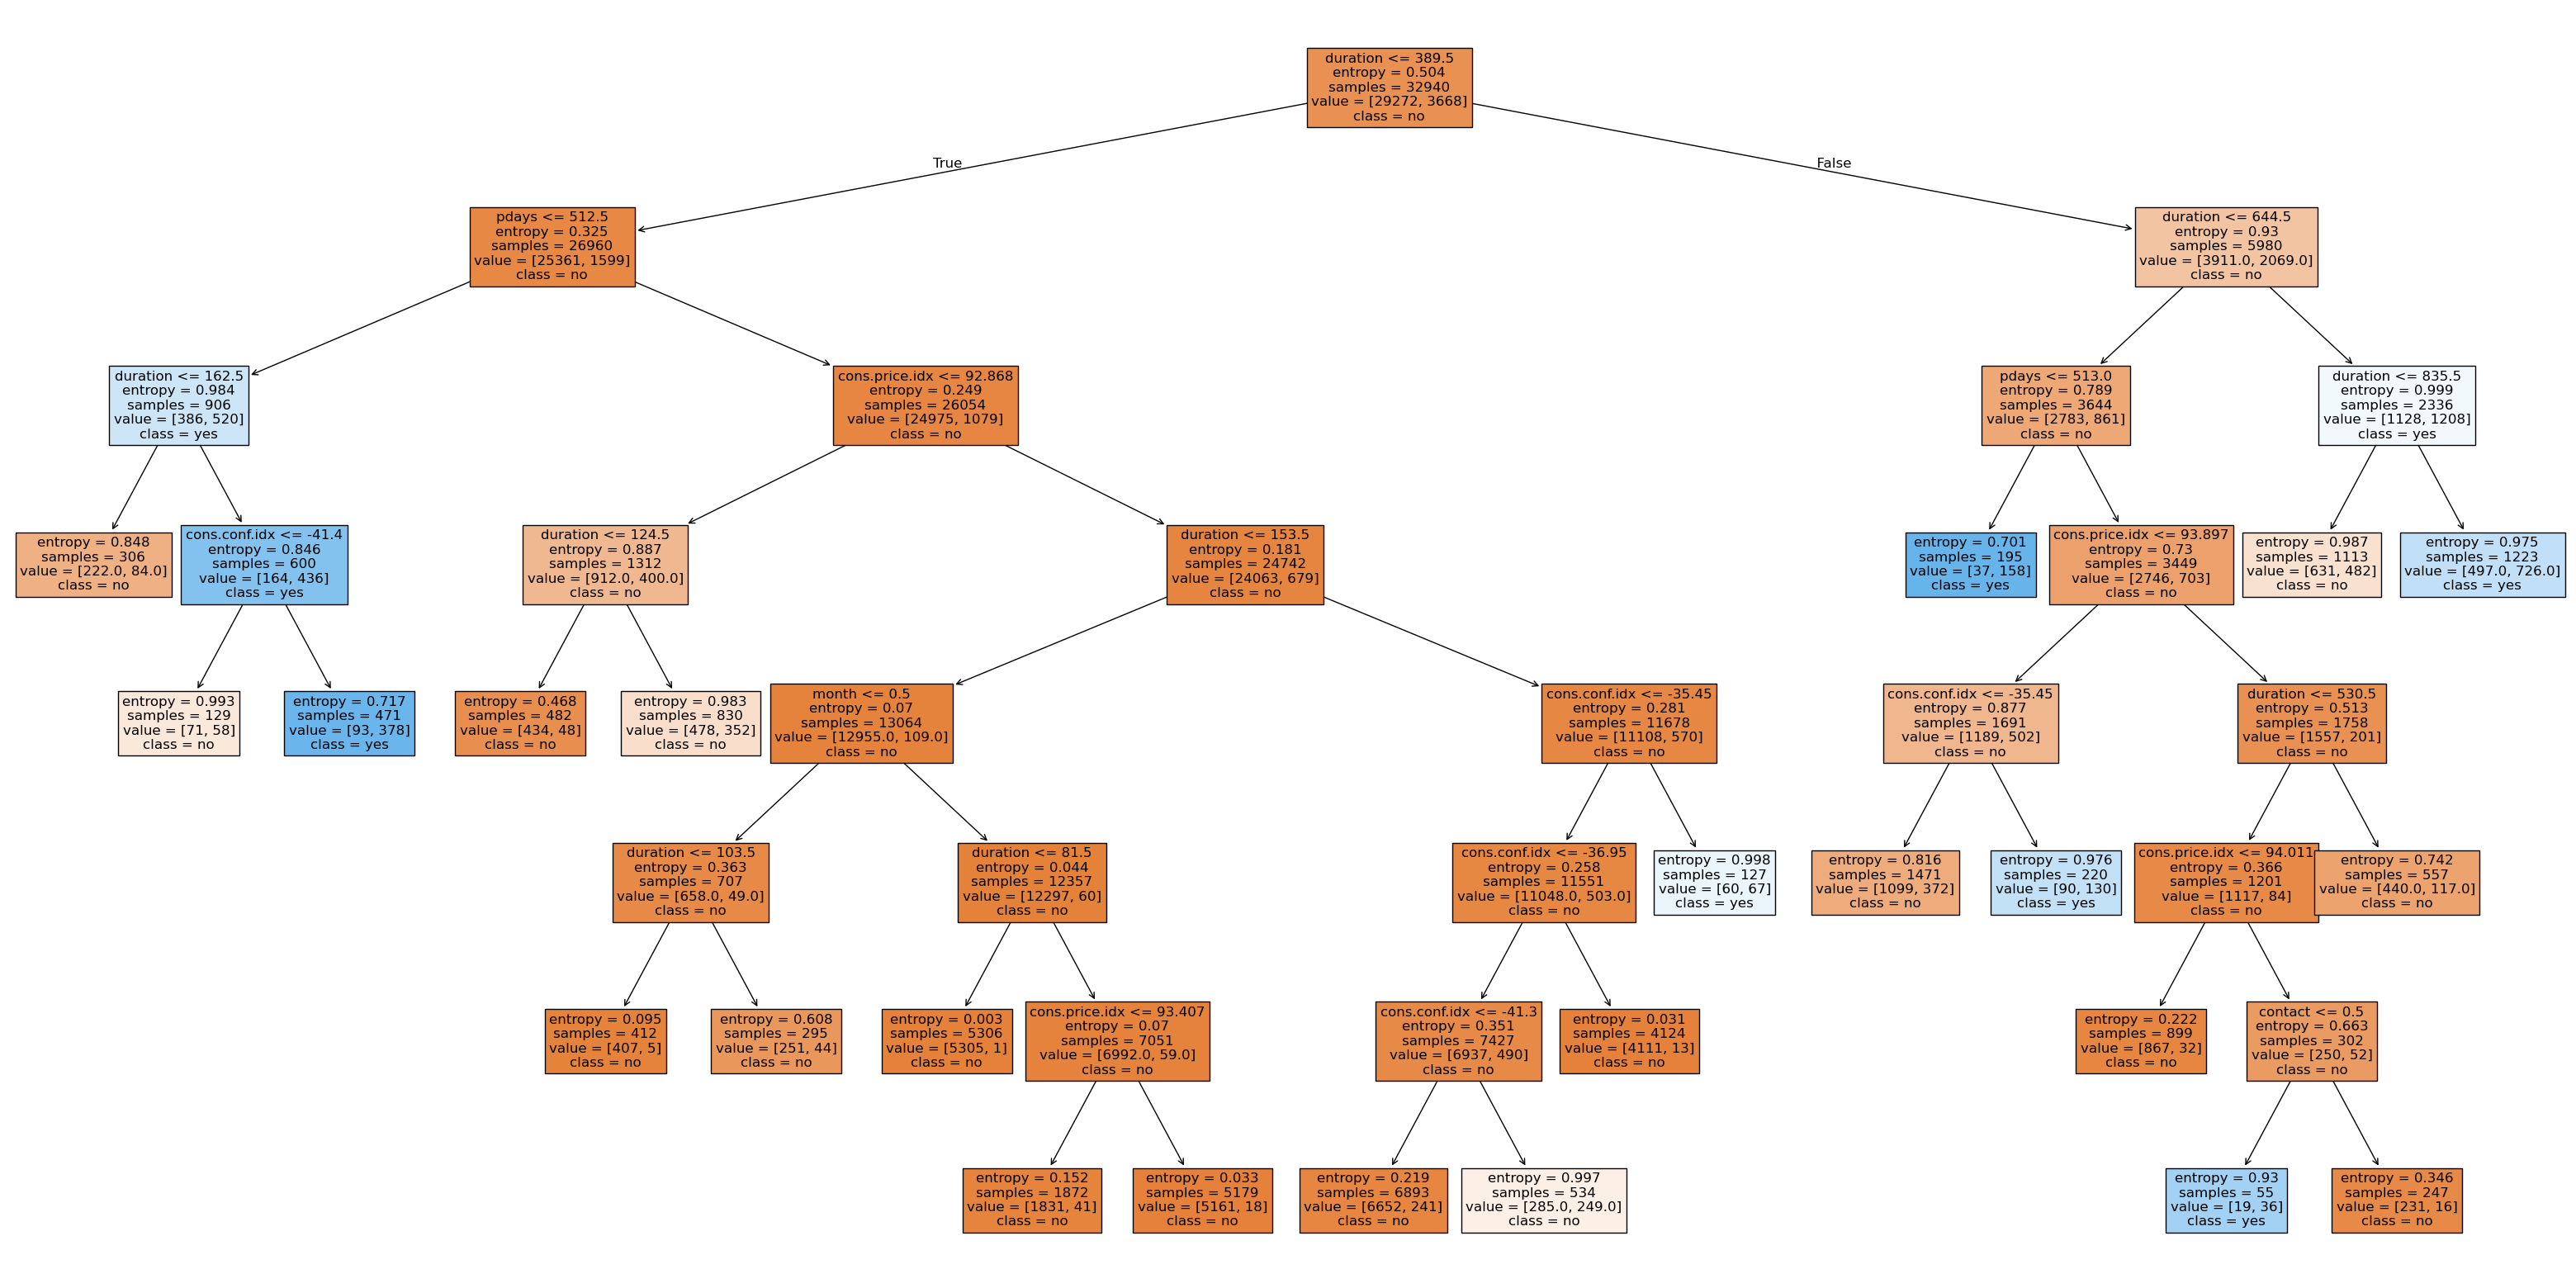

In [49]:
cn=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(DT_0, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()

# Conclusion

-  **High Accuracy For Criteria:**  Both Gini and Entropy provide high accuracy which is 90.1% for Gini and 90.2% for Entropy but we don't consider accuracy is our primary metric because our dataset is imbalanced.

-  **Performance Metrics Comparison:**  1]The Entropy criterion has a slightly better recall for the positive class (1), indicating it is better at identifying true positive instances.
                                                    2]The Gini criterion results in fewer false positives but more false negatives compared to Entropy.

  